https://beta.bls.gov/dataQuery/find?fq=survey:[ln]&s=popularity:D


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as st
import time
import datetime
import numpy as np

In [2]:
#List of presidents
Presidents = ["Donald Trump","Barack Obama","George W. Bush", "William J. Clinton",
             "George Bush", "Ronald Reagan", "Jimmy Carter", "Gerald R. Ford", "Richard Nixon"]
#Party affiliation according to presidents
PartyAff = ["R","D","R","D","R","R","D","R","R"]

#File path for ratings data
filepath = "../Data/Cleaned President Ratings/"


In [3]:
#Approval Ratings
Approval_Ratings = pd.DataFrame()
Start_Date = []
End_Date = []

#Put Names, start date and end date for each president.
for i in range(len(Presidents)):
    # Grab Approval ratings for each president and put their name into the dataframe
    Approval_Rating = pd.read_csv(f"{filepath}{Presidents[i]}-Ratings.csv")
    Approval_Rating["President"] = Presidents[i]
    Approval_Ratings = pd.concat([Approval_Ratings,Approval_Rating],ignore_index = True)
    
    #Put the start date and end date for each president, so I can put the names in the graphs later
    Start_Date.append(Approval_Rating["Start Date"][len(Approval_Rating["Start Date"])-1])
    End_Date.append(Approval_Rating["End Date"][0])

#Create the dataframe for presidents and their terms
President_Terms = pd.DataFrame({"Presidents":Presidents,
                                "Start Date":Start_Date,
                                "End Date":End_Date,
                               "Afilliation":PartyAff})
President_Terms

,Presidents,Start Date,End Date,Afilliation
0,Donald Trump,2017-01-23,2018-10-14,R
1,Barack Obama,2009-01-21,2017-01-19,D
2,George W. Bush,2001-02-01,2009-01-11,R
3,William J. Clinton,1993-01-24,2001-01-14,D
4,George Bush,1989-01-24,1993-01-11,R
5,Ronald Reagan,1981-01-30,1988-12-29,R
6,Jimmy Carter,1977-02-04,1980-12-08,D
7,Gerald R. Ford,1974-08-13,1976-12-13,R
8,Richard Nixon,1969-01-23,1974-08-05,R


In [4]:
#Clean up Approval Ratings by years by month

Average_Month_Approval_Ratings = Approval_Ratings.groupby(["Year","Month"]).mean().reset_index()
Average_Month_Approval_Ratings

,Year,Month,Approving,Disapproving,Unsure/NoData
0,1969,1,59.00,5.000000,36.000000
1,1969,2,59.00,6.000000,34.000000
2,1969,3,65.00,8.000000,26.000000
3,1969,4,59.00,16.000000,23.333333
4,1969,5,61.00,13.333333,24.333333
...,...,...,...,...,...
565,2018,6,42.25,53.500000,4.250000
566,2018,7,41.60,54.000000,4.400000
567,2018,8,40.75,54.000000,5.250000
568,2018,9,40.20,54.400000,5.400000


In [5]:
#Get Unemployment Data
byRace = ["White","Black or African American", "Hispanic or Latino", "Asian"]
Unemployment_Data = pd.read_csv("../Data/Unemployment Data_.csv")
Unemployment_Data["Race"] = "All" 

for race in byRace:
    filepath = f"../Data/Unemployment Data_{race}.csv"
    T_Unemployment_Data = pd.read_csv(filepath)
    T_Unemployment_Data["Race"] = race
    Unemployment_Data = Unemployment_Data.append(T_Unemployment_Data)

Unemployment_Data

,Years,Months,Unemployment Rate,Race
0,2019,9,3.5,All
1,2019,8,3.7,All
2,2019,7,3.7,All
3,2019,6,3.7,All
4,2019,5,3.6,All
...,...,...,...,...
196,2003,5,5.5,Asian
197,2003,4,6.0,Asian
198,2003,3,6.5,Asian
199,2003,2,5.8,Asian


In [6]:
Lookat = "All" #Choose a selection, All for all, and race from byRace

#Find all the data for Lookat
AllRace_Unemployment_Data = Unemployment_Data.loc[Unemployment_Data["Race"]==Lookat]
Total_Data = pd.merge(Average_Month_Approval_Ratings,AllRace_Unemployment_Data, how = "inner", 
                      left_on=["Year","Month"], right_on=["Years","Months"])
Total_Data = Total_Data.drop(columns = ["Years","Months"])


0    54.238915
1    53.517034
2    52.795153
3    52.073272
4    51.351391
5    50.629511
6    49.907630
7    49.185749
8    48.463868
9    47.741987
dtype: float64

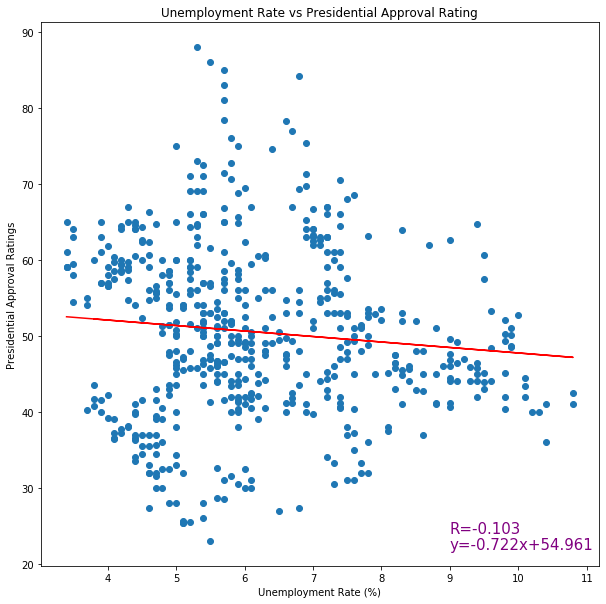

In [7]:
#Plot Unemployment Rate vs Presidential Approval Rating
plt.figure(figsize=(10,10))
plt.scatter(Total_Data["Unemployment Rate"],Total_Data["Approving"])


plt.ylabel("Presidential Approval Ratings")
plt.xlabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs Presidential Approval Rating")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Total_Data["Unemployment Rate"],Total_Data["Approving"])
y_values = Total_Data["Unemployment Rate"]*slope + intercept

plt.plot(Total_Data["Unemployment Rate"],y_values,"r-")
plt.annotate(f"R={round(rvalue,3)}",(9,24),size=15,color='purple'),
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(9,22),size = 15,color='purple')

x1 = pd.Series([1,2,3,4,5,6,7,8,9,10])
x1*slope + intercept

C:\Users\Abraham\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


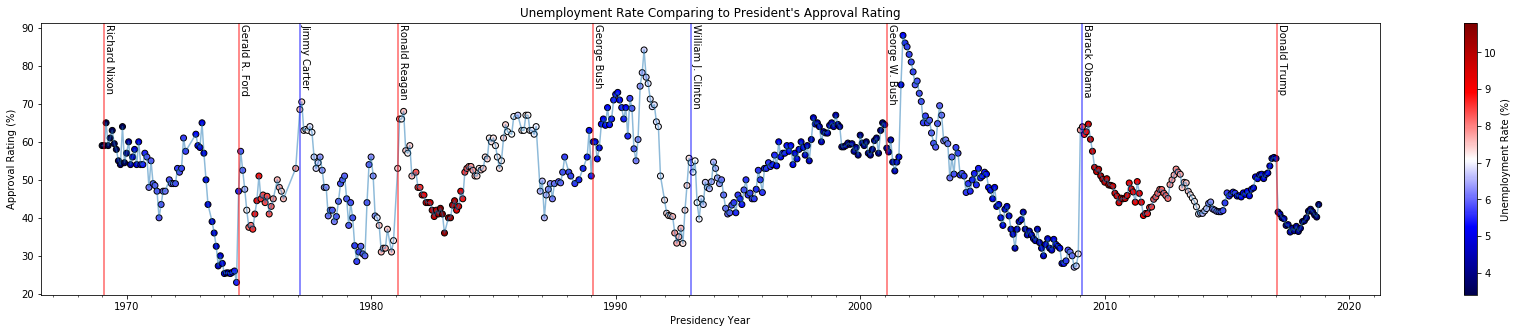

In [8]:
#Combined Months and Years into datetime
M_Y = []
for i in range(len(Total_Data)):
    M_Y.append(datetime.date(Total_Data["Year"][i],Total_Data["Month"][i],1))
Total_Data["M_Y"] = M_Y
Total_Data


plt.figure(figsize = (30,5))
plt.scatter(Total_Data["M_Y"], Total_Data["Approving"], c=Total_Data["Unemployment Rate"],cmap = "seismic", edgecolor='black')
plt.plot(Total_Data["M_Y"], Total_Data["Approving"], alpha =0.5)
# plt.gca().xaxis.set_major_locator(dates.YearLocator())
plt.gca().xaxis.set_minor_locator(dates.YearLocator())
# plt.xticks(rotation=90)
for terms in range(len(President_Terms)):
    if(President_Terms["Afilliation"][terms]=="R"):
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Red")
    else:
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Blue")
    plt.text(President_Terms["Start Date"][terms], 91, Presidents[terms],rotation=270,verticalalignment='top', 
                 horizontalalignment = "left")

plt.colorbar().set_label("Unemployment Rate (%)")
plt.xlabel("Presidency Year") 
plt.ylabel("Approval Rating (%)")
plt.title("Unemployment Rate Comparing to President's Approval Rating")

# plt.axvline(x=datetime.date(1973,1,1), alpha = 0.3, color="g")

plt.savefig("President's Approval Rating Comparing to Unemployment Rate.png")


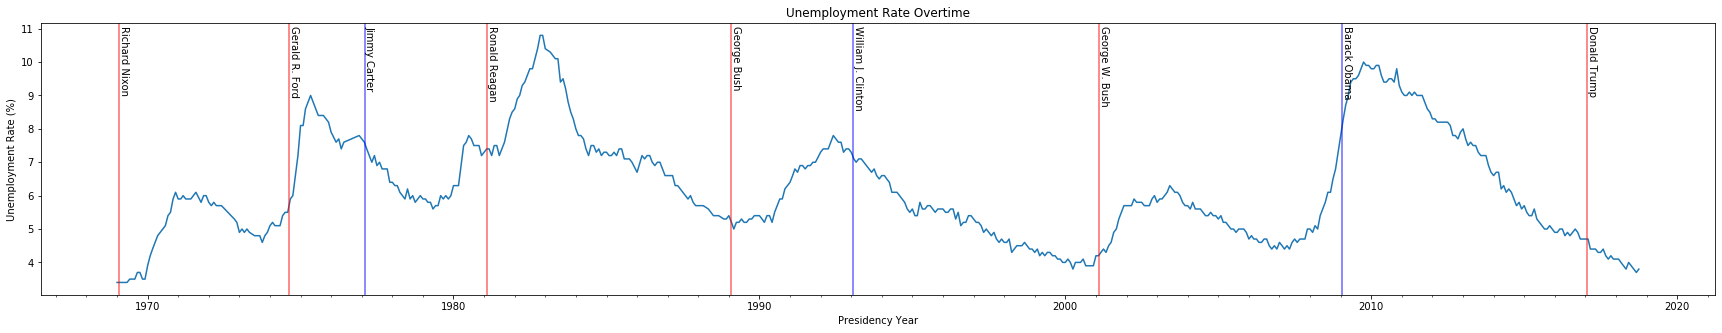

In [9]:
#Plot Years vs Unemployment Rating
plt.figure(figsize = (30,5))
plt.plot(Total_Data["M_Y"], Total_Data["Unemployment Rate"])
# plt.gca().xaxis.set_major_locator(dates.YearLocator())
plt.gca().xaxis.set_minor_locator(dates.YearLocator())
# plt.xticks(rotation=90)
for terms in range(len(President_Terms)):
    if(President_Terms["Afilliation"][terms]=="R"):
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Red")
    else:
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Blue")
    plt.text(President_Terms["Start Date"][terms], 11.1, Presidents[terms],rotation=270,verticalalignment='top', 
                 horizontalalignment = "left")

# plt.colorbar().set_label("Approval Rating(%)")
plt.xlabel("Presidency Year") 
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Overtime")
plt.savefig("Unemployment Rate Overtime.png")

Text(0.5, 0, 'Years')

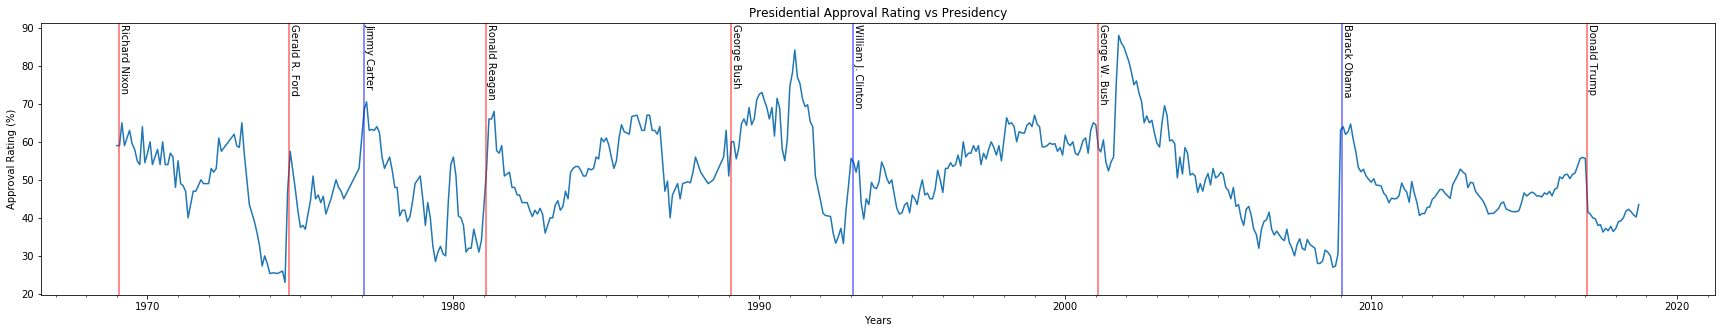

In [10]:
#Plot Years vs Approval Rating
plt.figure(figsize=(30,5))
plt.plot(Total_Data["M_Y"], Total_Data["Approving"])
for terms in range(len(President_Terms)):
    if(President_Terms["Afilliation"][terms]=="R"):
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Red")
    else:
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Blue")
    plt.text(President_Terms["Start Date"][terms], 91, Presidents[terms],rotation=270,verticalalignment='top', 
                 horizontalalignment = "left")

plt.gca().xaxis.set_minor_locator(dates.YearLocator())

plt.title("Presidential Approval Rating vs Presidency")
plt.ylabel("Approval Rating (%)")
plt.xlabel("Years")